In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as tgrad
import torch.nn.functional as F


import os
import time
import tqdm
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

In [2]:
# extract data
loss_list = pd.read_csv('default/pinn_loss.csv').to_numpy()
loss_list2 = pd.read_csv('default/ipinn_loss.csv').to_numpy()
loss_list4 = pd.read_csv('default/awpinn_loss.csv').to_numpy()
loss_list5 = pd.read_csv('default/awipinn_loss.csv').to_numpy()
loss_list6 = pd.read_csv('default/nn_loss.csv').to_numpy()
print('Done')

Done


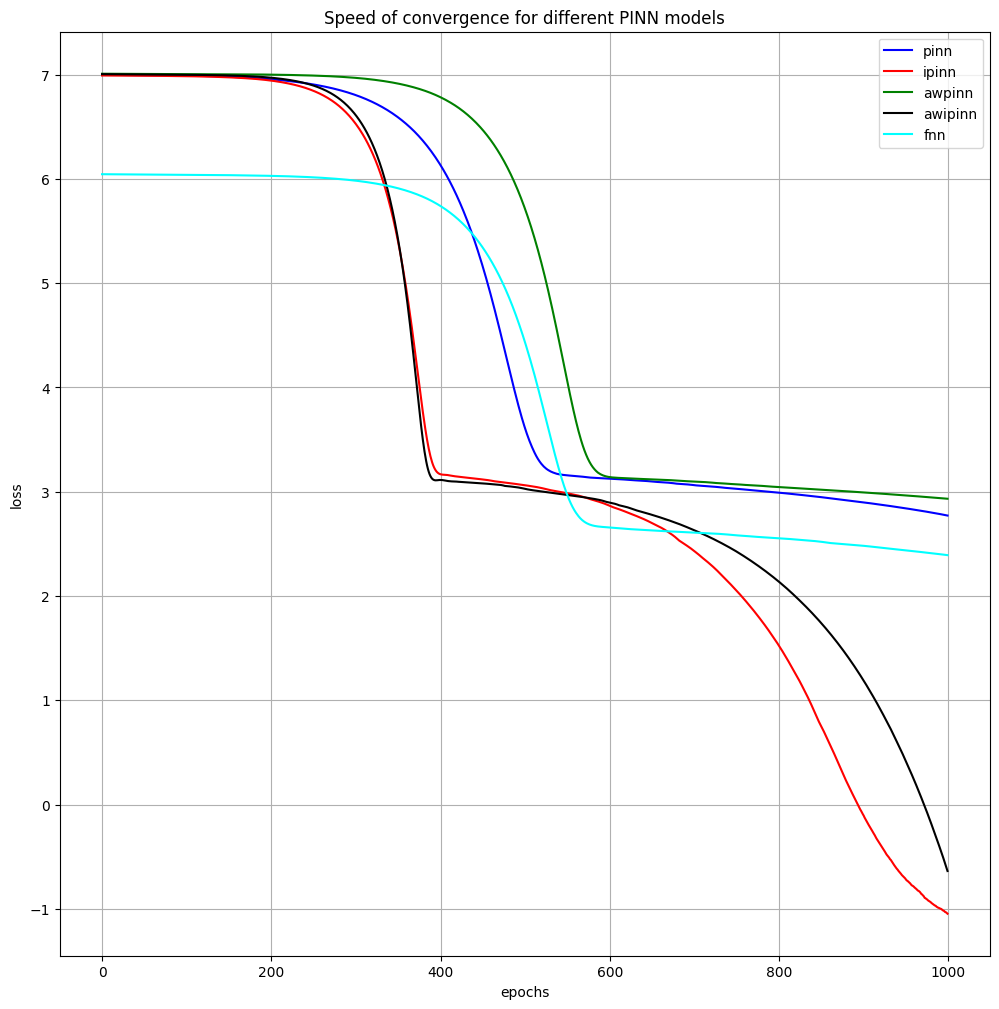

In [3]:
fig = plt.figure(figsize=(12,12))
plt.plot(range(1000), [np.log(item) for item in loss_list[:1000]], color='blue', label='pinn')
plt.plot(range(1000), [np.log(item) for item in loss_list2[:1000]], color='red', label='ipinn')
plt.plot(range(1000), [np.log(item) for item in loss_list4[:1000]], color='green', label='awpinn')
plt.plot(range(1000), [np.log(item) for item in loss_list5[:1000]], color='black', label='awipinn')
plt.plot(range(1000), [np.log(item) for item in loss_list6[:1000]], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

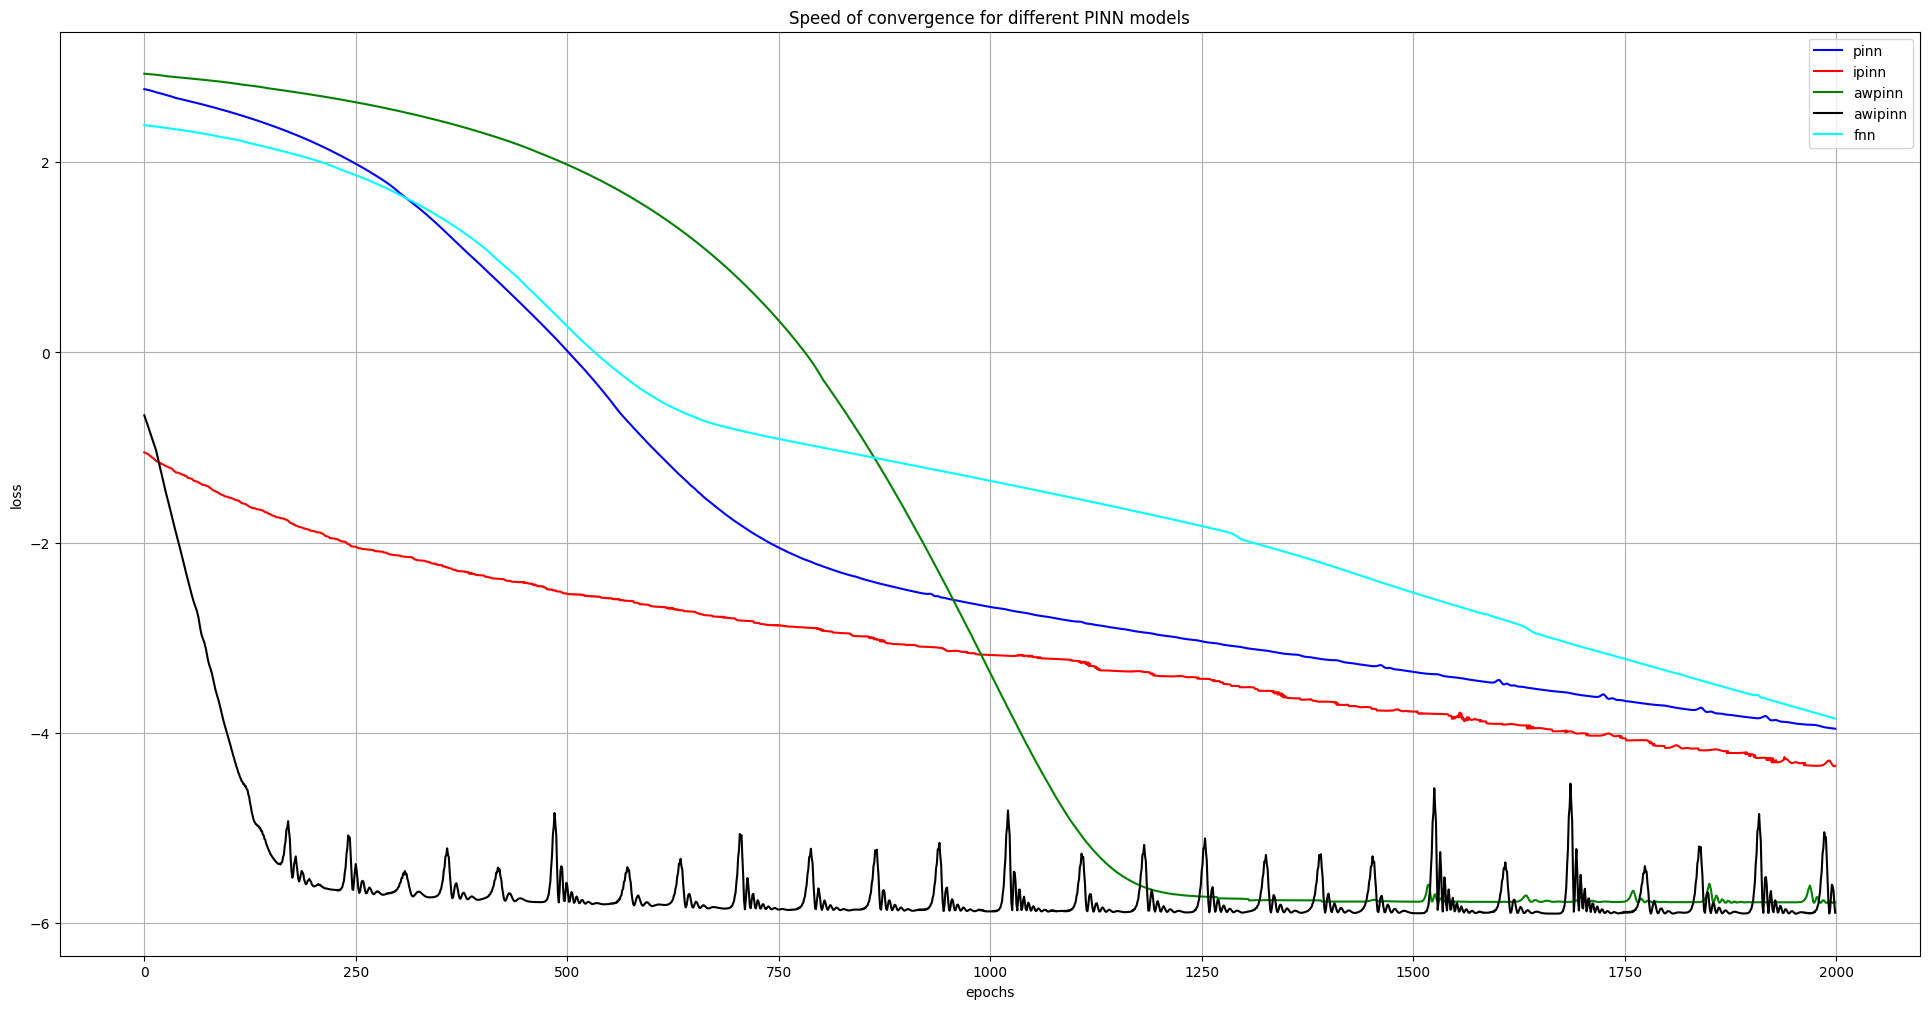

In [4]:
fig = plt.figure(figsize=(24,12))
plt.plot(range(2000), [np.log(item) for item in loss_list[1000:3000]], color='blue', label='pinn')
plt.plot(range(2000), [np.log(item) for item in loss_list2[1000:3000]], color='red', label='ipinn')
plt.plot(range(2000), [np.log(item) for item in loss_list4[1000:3000]], color='green', label='awpinn')
plt.plot(range(2000), [np.log(item) for item in loss_list5[1000:3000]], color='black', label='awipinn')
plt.plot(range(2000), [np.log(item) for item in loss_list6[1000:3000]], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

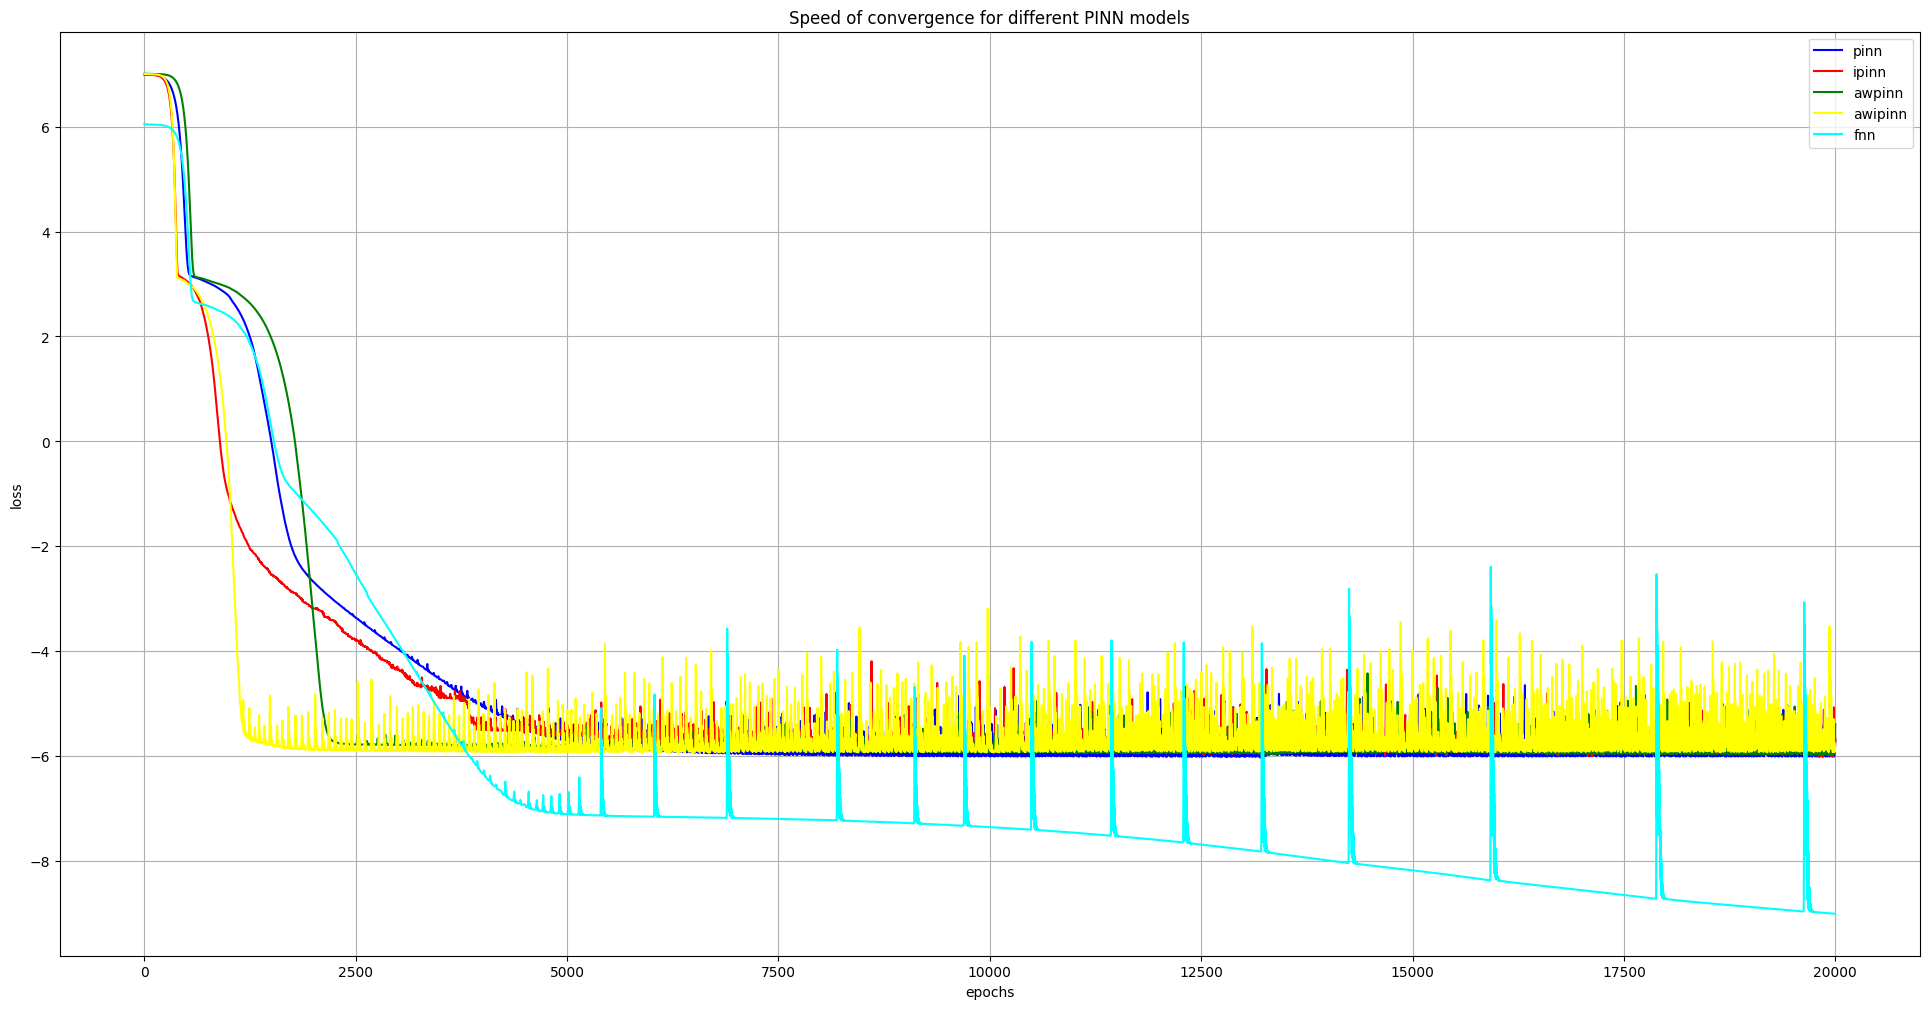

In [5]:
fig = plt.figure(figsize=(24,12))
plt.plot(range(20000), [np.log(item) for item in loss_list[:20000]], color='blue', label='pinn')
plt.plot(range(20000), [np.log(item) for item in loss_list2[:20000]], color='red', label='ipinn')
plt.plot(range(20000), [np.log(item) for item in loss_list4[:20000]], color='green', label='awpinn')
plt.plot(range(20000), [np.log(item) for item in loss_list5[:20000]], color='yellow', label='awipinn')
plt.plot(range(20000), [np.log(item) for item in loss_list6[:20000]], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

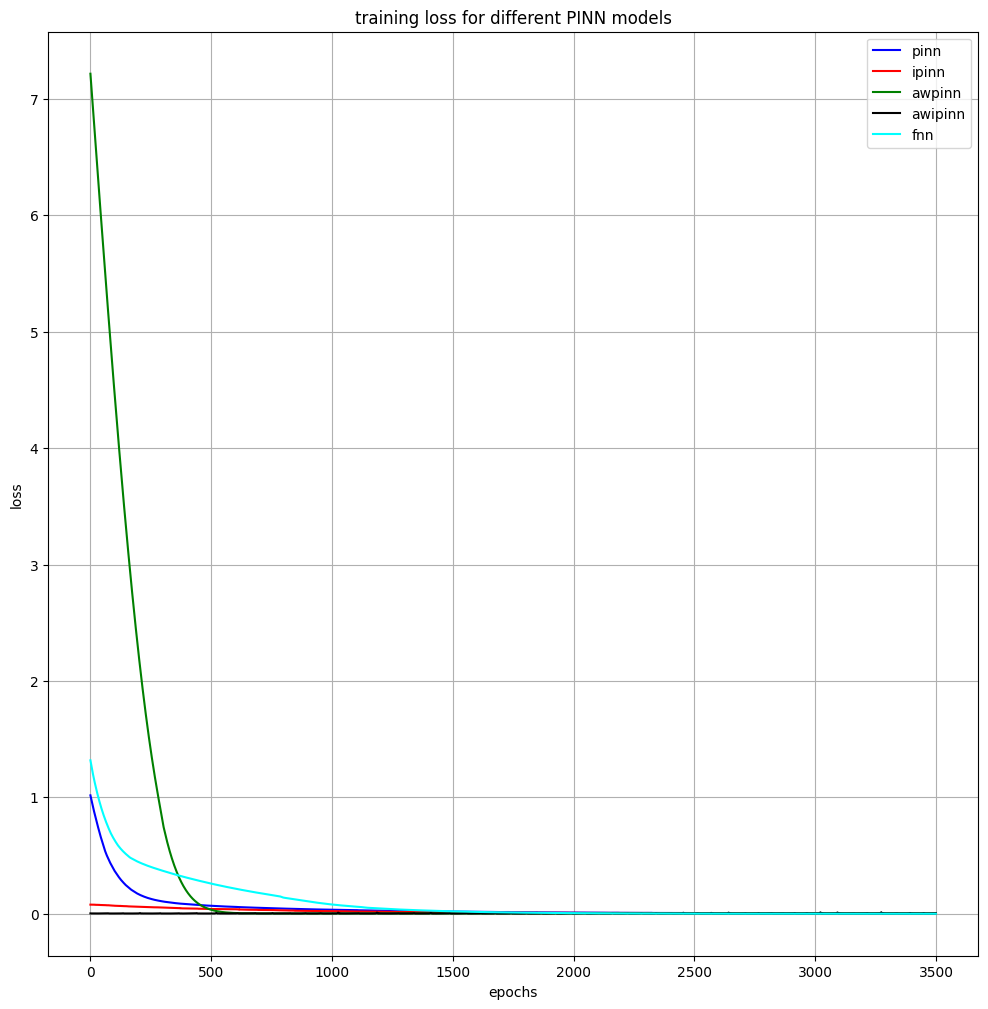

In [6]:
fig = plt.figure(figsize=(12,12))
plt.plot(range(3500), loss_list[1500:5000], color='blue', label='pinn')
plt.plot(range(3500), loss_list2[1500:5000], color='red', label='ipinn')
plt.plot(range(3500), loss_list4[1500:5000], color='green', label='awpinn')
plt.plot(range(3500), loss_list5[1500:5000], color='black', label='awipinn')
plt.plot(range(3500), loss_list6[1500:5000], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'training loss for different PINN models')
plt.grid(True)

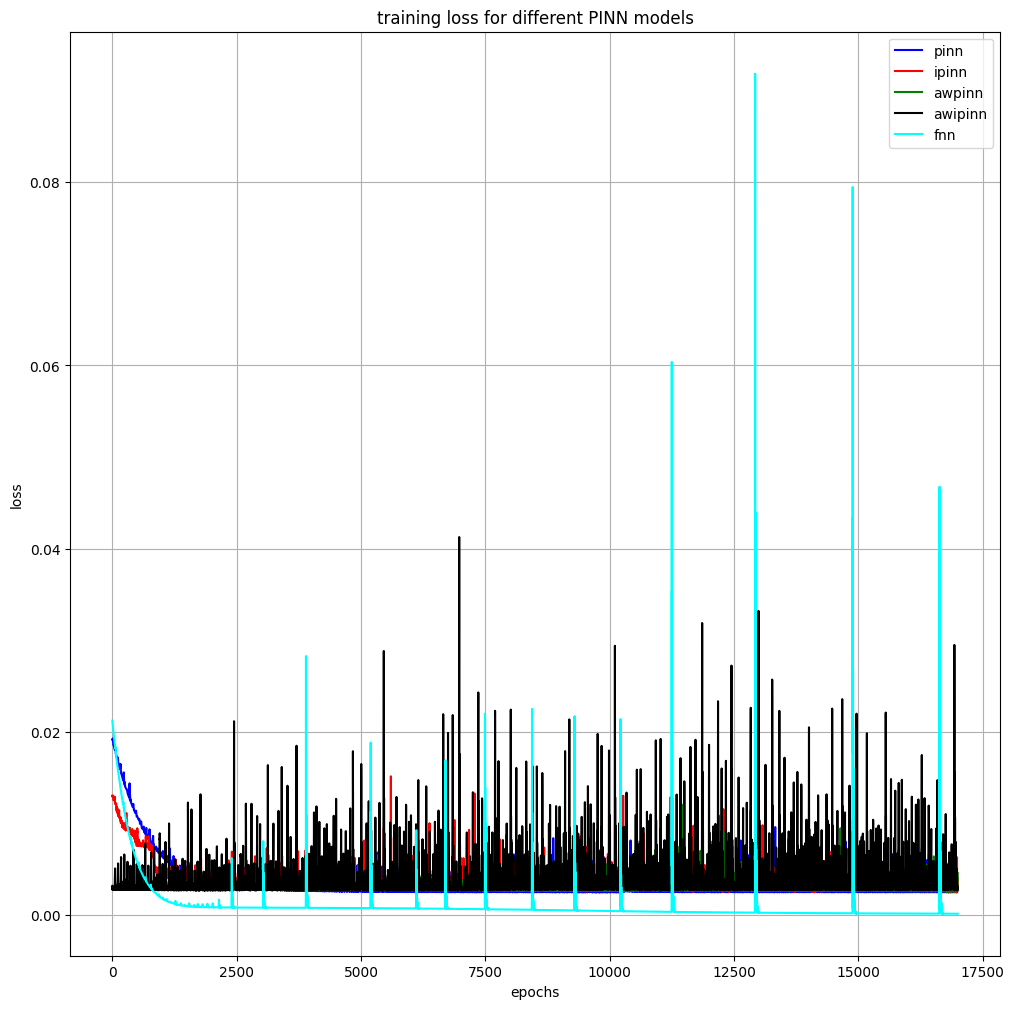

In [7]:
fig = plt.figure(figsize=(12,12))
plt.plot(range(17000), loss_list[3000:], color='blue', label='pinn')
plt.plot(range(17000), loss_list2[3000:], color='red', label='ipinn')
plt.plot(range(17000), loss_list4[3000:], color='green', label='awpinn')
plt.plot(range(17000), loss_list5[3000:], color='black', label='awipinn')
plt.plot(range(17000), loss_list6[3000:], color='cyan', label='fnn')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'training loss for different PINN models')
plt.grid(True)

# PINN Weights difference

In [8]:
weights = [[0.5, 0.25, 0.25], [0.25, 0.5, 0.25], [0.25, 0.25, 0.5], [0.7, 0.15, 0.15], [0.15, 0.7, 0.15], [0.15, 0.15, 0.7]]
n_epochs = 5000

In [9]:
loss_hists_lists = []

# extract data
for i in range(len(weights)):
    loss_hists_lists.append(pd.read_csv(f'pinn-weight-test/pinn-{weights[i][0]}-{weights[i][1]}-{weights[i][2]}_loss.csv').to_numpy())
    pass
print('Done')

Done


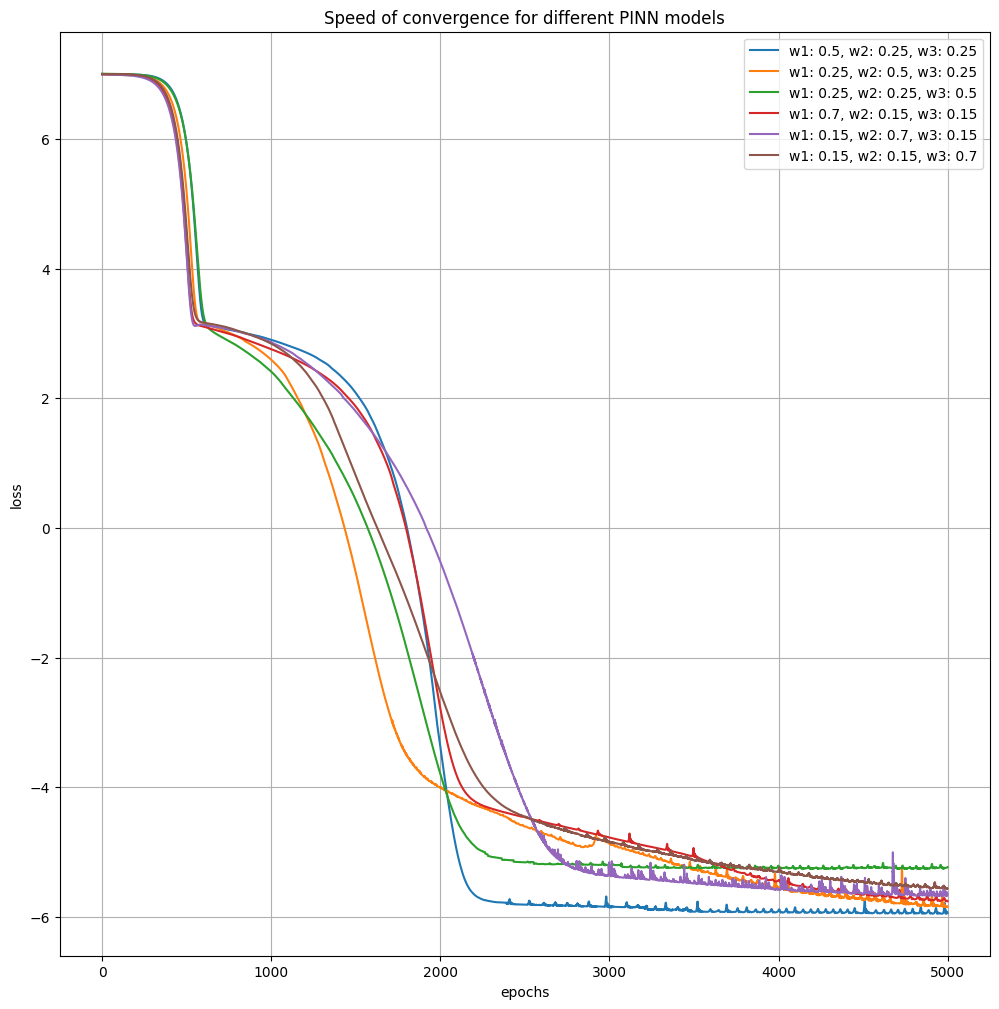

In [10]:
fig = plt.figure(figsize=(12,12))
for i in range(len(weights)):
    plt.plot(range(n_epochs), [np.log(item) for item in loss_hists_lists[i]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence for different PINN models')
plt.grid(True)

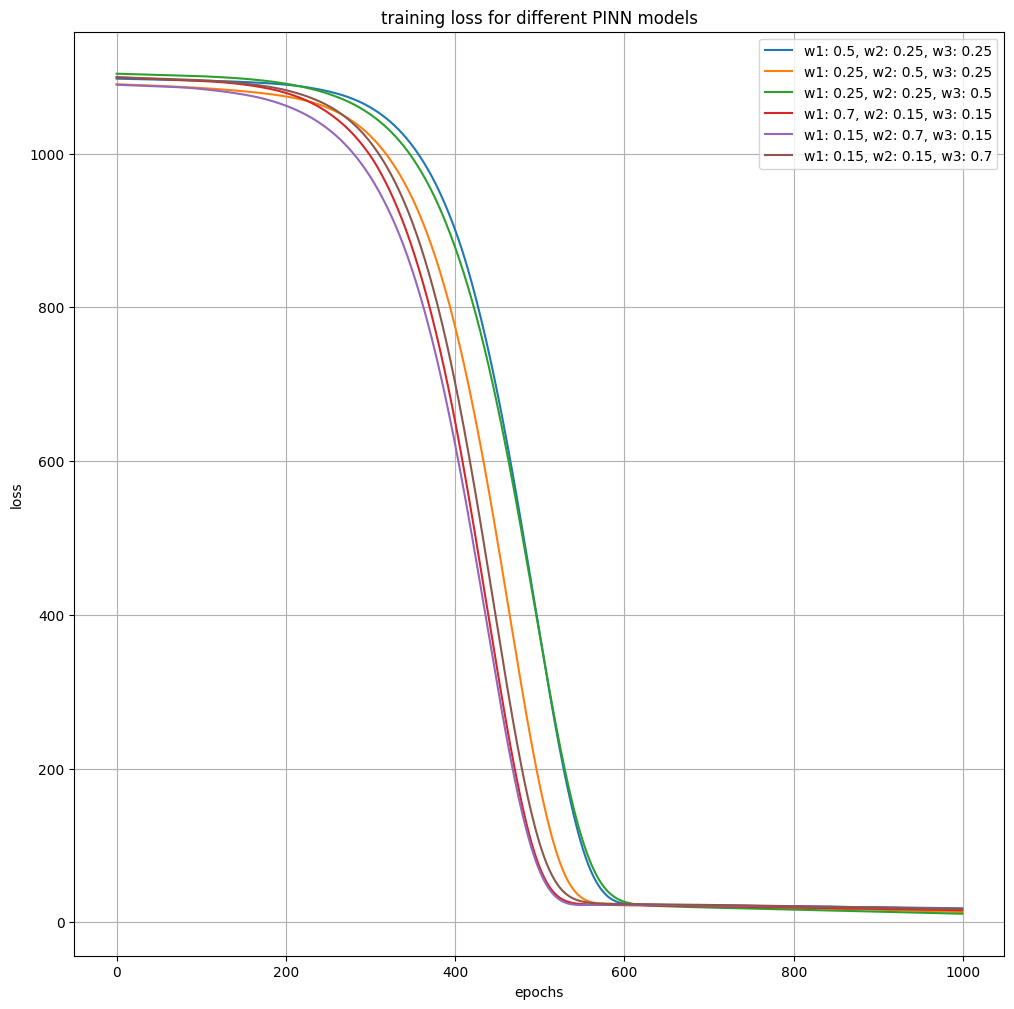

In [11]:
fig = plt.figure(figsize=(12,12))
for i in range(len(weights)):
    plt.plot(range(1000), [item for item in loss_hists_lists[i][:1000]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'training loss for different PINN models')
plt.grid(True)

# IPINN Weight Difference

In [12]:
loss_hists_lists2 = []
# extract data
for i in range(len(weights)):
    loss_hists_lists2.append(pd.read_csv(f'ipinn-weight-test/ipinn-{weights[i][0]}-{weights[i][1]}-{weights[i][2]}_loss.csv').to_numpy())
    pass
print('Done')

Done


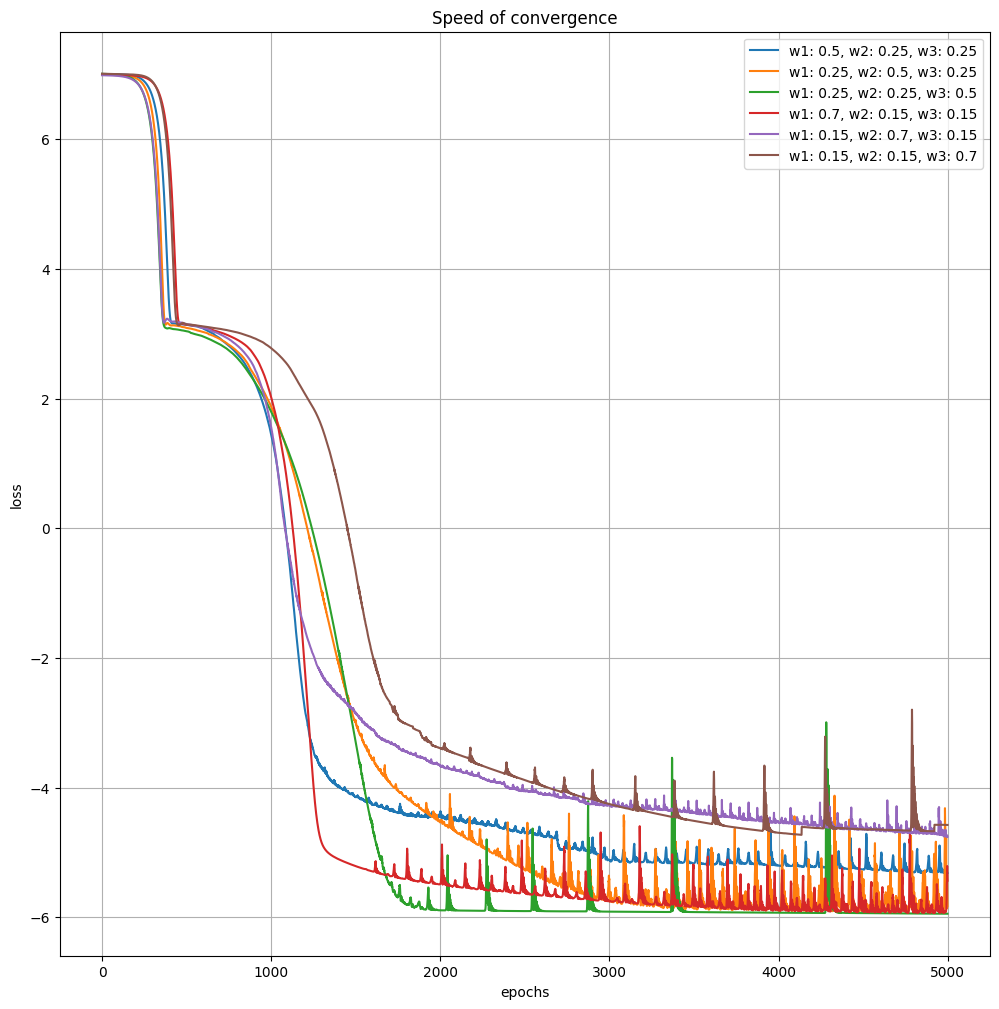

In [13]:
fig = plt.figure(figsize=(12,12))
for i in range(len(weights)):
    plt.plot(range(n_epochs), [np.log(item) for item in loss_hists_lists2[i]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'Speed of convergence')
plt.grid(True)

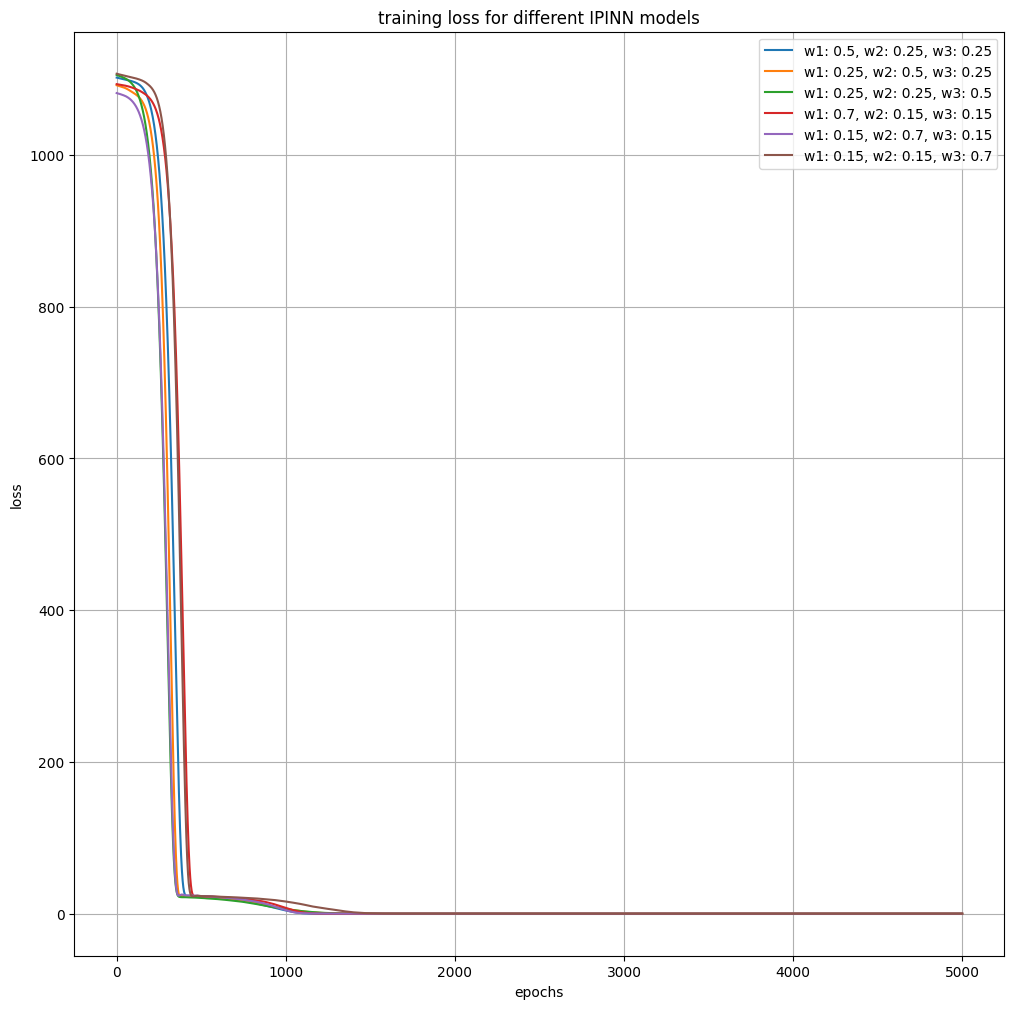

In [14]:
fig = plt.figure(figsize=(12,12))
for i in range(len(weights)):
    plt.plot(range(5000), [item for item in loss_hists_lists2[i][:5000]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title(f'training loss for different IPINN models')
plt.grid(True)